# Let's draw some graphs

Text(0, 0.5, 'cost\n(parking only')

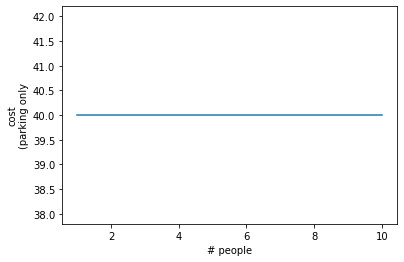

In [1]:
# Line

# example: parking fee remains the same when people share one car
import numpy as np
import matplotlib.pyplot as plt

people = np.arange(1, 11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()
ax.plot(people, total_cost)
ax.set_xlabel("# people")
ax.set_ylabel("cost\n(parking only")

In [2]:
# now add concert ticket fee for each person 
import pandas as pd
people = np.arange(1, 11)
total_cost = 80.0 * people + 40.0

display(pd.DataFrame({'total_cost': total_cost.astype(int)}, index = people).T) # T: ranspose

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


Text(0, 0.5, 'total_cost')

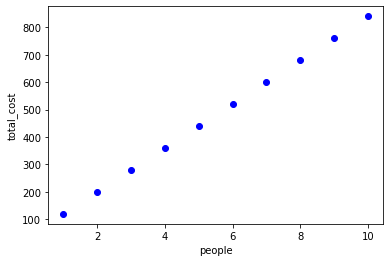

In [3]:
# move into 2d space
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_xlabel("people")
ax.set_ylabel("total_cost")

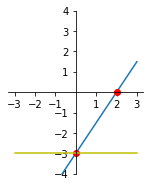

In [4]:
# draw a linear equation

from mlwpy import *
# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

# slope m and intercept b
m, b = 1.5, -3

ax = plt.gca()
ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4, 4)
high_school_style(ax)

ax.plot(0, -3, 'ro')
ax.plot(2, 0, 'ro')

ys = 0 * xs + b
ax.plot(xs, ys, 'y')

,0,1
0,-3.000000,1.000000
1,-2.939394,1.000000
2,-2.878788,1.000000
3,-2.818182,1.000000
4,-2.757576,1.000000


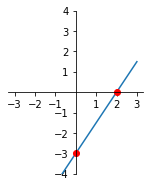

In [13]:
# another way to do it

# np.c_[] lets us create an array column-by-column
xs = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

# view the first few rows
display(pd.DataFrame(xs_p1).head().style)

w = np.array([1.5, -3])
ys = np.dot(xs_p1, w)
ax = plt.gca()
ax.plot(xs, ys)
ax.set_ylim(-4, 4)
high_school_style(ax)
ax.plot(0, -3, 'ro') # y intercept
ax.plot(2, 0, 'ro')

In [16]:
# expand to multiple dimensions

# example: total cost to go to concert = ticket * # people + drink(root beer) * # rb + parking
number_people = np.arange(1, 11)
number_rbs = np.arange(0, 20)

number_people, number_rbs = np.meshgrid(number_people, number_rbs)
total_cost = 80 * number_people + 10 * number_rbs + 40
total_cost

array([[ 120,  200,  280,  360,  440,  520,  600,  680,  760,  840],
       [ 130,  210,  290,  370,  450,  530,  610,  690,  770,  850],
       [ 140,  220,  300,  380,  460,  540,  620,  700,  780,  860],
       [ 150,  230,  310,  390,  470,  550,  630,  710,  790,  870],
       [ 160,  240,  320,  400,  480,  560,  640,  720,  800,  880],
       [ 170,  250,  330,  410,  490,  570,  650,  730,  810,  890],
       [ 180,  260,  340,  420,  500,  580,  660,  740,  820,  900],
       [ 190,  270,  350,  430,  510,  590,  670,  750,  830,  910],
       [ 200,  280,  360,  440,  520,  600,  680,  760,  840,  920],
       [ 210,  290,  370,  450,  530,  610,  690,  770,  850,  930],
       [ 220,  300,  380,  460,  540,  620,  700,  780,  860,  940],
       [ 230,  310,  390,  470,  550,  630,  710,  790,  870,  950],
       [ 240,  320,  400,  480,  560,  640,  720,  800,  880,  960],
       [ 250,  330,  410,  490,  570,  650,  730,  810,  890,  970],
       [ 260,  340,  420,  500,  5

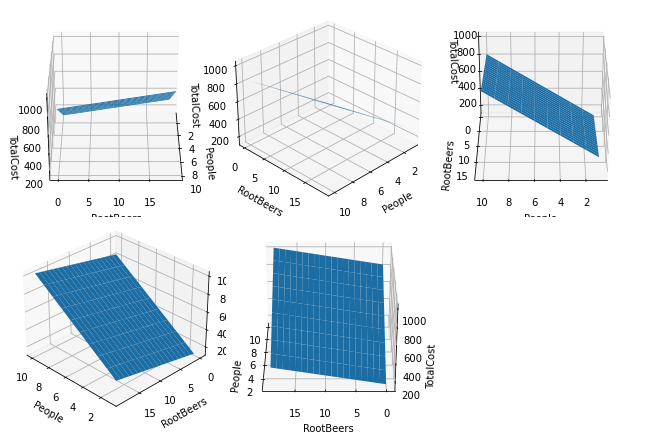

In [20]:
# view data in a plane

# import needed for 3d projection
from mpl_toolkits.mplot3d import Axes3D

fig, axes = plt.subplots(2, 3, subplot_kw={'projection':'3d'}, figsize = (9, 6))
angles = [0, 45, 90, 135, 180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel('People')
    ax.set_ylabel("RootBeers")
    ax.set_zlabel("TotalCost")
    ax.azim = angle

axes.flat[-1].axis('off')
fig.tight_layout()


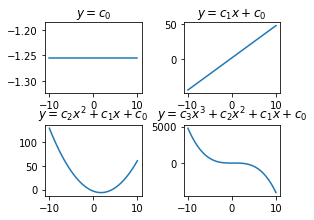

In [21]:
# nonlinearity

fig, axes = plt.subplots(2, 2)
fig.tight_layout()

titles = ["$y=c_0$",
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)
    

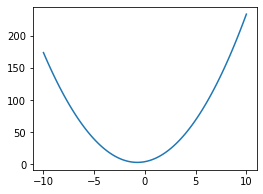

In [23]:
# another way to do it
plt.Figure((2, 1.5))
xs = np.linspace(-10, 10, 101)
coeffs = np.array([2, 3, 4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])
plt.plot(xs, ys)